# BAR CHART ALTAIR

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import altair as alt
alt.renderers.enable('png')

RendererRegistry.enable('png')

In [2]:
# import données
# https://www.data.gouv.fr/fr/datasets/la-table-boamp-siren-acheteurs-80-daufilduboamp/
df = pd.read_parquet('https://www.data.gouv.fr/fr/datasets/r/4b77da19-3834-4a12-9626-9aedd75d168a')
#dft2 = pd.read_parquet('../0000_PREPA_BOAMP_NOTNA_2024_POUR_PATCH/EXPORT_AFDB_MERGE_PREPARE/boamp_siren_acheteurs_trimestre_2_2024_80_colonnes.parquet')

In [3]:
#df = pd.concat([dft1, dft2]).copy()
df.shape

(33080, 80)

In [4]:
df.head()

,B_01_annonceLie,B_02_annonceReferenceSchemaV110,B_03_annoncesAnterieuresSchemaV110,B_04_codeDepartement,B_05_codeDepartementPrestation,B_06_criteres,B_07_dateFinDiffusion,B_08_dateLimiteReponse,B_09_dateParution,B_10_dc,B_11_descripteurCode,B_12_descripteurLibelle,B_13_etat,B_14_famille,B_15_familleLibelle,B_16_filename,B_17_idweb,B_18_marchePublicSimplifie,B_19_marchePublicSimplifieLabel,B_20_nature,B_21_natureCategorise,B_22_natureCategoriseLibelle,B_23_natureLibelle,B_24_nomAcheteur,B_25_objet,B_26_perimetre,B_27_procedureCategorise,B_28_procedureLibelle,B_29_sourceSchema,B_30_sousNature,B_31_sousNatureLibelle,B_32_sousTypeProcedure,B_33_titulaire,B_34_typeAvis,B_35_typeMarche,B_36_typeMarcheFacette,B_37_typeProcedure,B_38_urlAvis,B_39_id,B_40_GESTION,B_41_GESTION_URL_JSON,B_42_DONNEES,B_43_DONNEES_URL_JSON,B_44_ANNONCES_ANTERIEURES,B_45_ANNONCES_ANTERIEURES_URL_JSON,B_46_SIRET_ACHETEURS_BRUTS,SN_01_activitePrincipaleUniteLegale,SN_02_anneeCategorieEntreprise,SN_03_anneeEffectifsUniteLegale,SN_04_caractereEmployeurUniteLegale,SN_05_categorieEntreprise,SN_06_categorieJuridiqueUniteLegale,SN_07_dateCreationUniteLegale,SN_08_dateDebut,SN_09_dateDernierTraitementUniteLegale,SN_10_denominationUniteLegale,SN_11_denominationUsuelle1UniteLegale,SN_12_denominationUsuelle2UniteLegale,SN_13_denominationUsuelle3UniteLegale,SN_14_economieSocialeSolidaireUniteLegale,SN_15_etatAdministratifUniteLegale,SN_16_identifiantAssociationUniteLegale,SN_17_nicSiegeUniteLegale,SN_18_nomUniteLegale,SN_19_nomUsageUniteLegale,SN_20_nombrePeriodesUniteLegale,SN_21_nomenclatureActivitePrincipaleUniteLegale,SN_22_prenom1UniteLegale,SN_23_prenom2UniteLegale,SN_24_prenom3UniteLegale,SN_25_prenom4UniteLegale,SN_26_prenomUsuelUniteLegale,SN_27_pseudonymeUniteLegale,SN_28_sexeUniteLegale,SN_29_sigleUniteLegale,SN_30_siren,SN_31_societeMissionUniteLegale,SN_32_statutDiffusionUniteLegale,SN_33_trancheEffectifsUniteLegale,SN_34_unitePurgeeUniteLegale
0,23-140829,<NA>,<NA>,78,<NA>,environnementaux,2024-01-30,<NA>,2024-01-01 00:00:00+00:00,461,461,Mise à disposition de personnel,INITIAL,JOUE,Marchés européens,BOAMP-J-IC-AA_2024_001005,23-181344,<NA>,<NA>,ATTRIBUTION,attribution/standard,Résultat de marché/,Résultat de marché,Le Syndicat Intercommunal d'aménagemen,"Accueil, information et médiation pour le Chât...",DIRECTIVE-24,OUVERT/,Procédure Ouverte,<NA>,STANDARD,<NA>,<NA>,MUSEA,",10,6",SERVICES,Services,OUVERT,https://www.boamp.fr/pages/avis/?q=idweb:23-18...,23_181344,"{""REFERENCE"": {""IDWEB"": ""23-181344"", ""TYPE_AVI...",https://www.aufilduboamp.com/partages/aufildub...,"{""IDENTITE"": {""DENOMINATION"": ""Le Syndicat Int...",https://www.aufilduboamp.com/partages/aufildub...,"{""REFERENCE"": {""IDWEB"": ""23-140829"", ""TYPE_AVI...",https://www.aufilduboamp.com/partages/aufildub...,<NA>,84.11Z,2021,2021,<NA>,PME,7354,1980-01-01,2021-11-08,2024-03-22T14:26:06,SYNDICAT INTERCOMMUNAL A VOCATION MULTIPLE DE ...,<NA>,<NA>,<NA>,N,A,<NA>,00011,<NA>,<NA>,6,NAFRev2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,247800055,<NA>,O,03,<NA>
1,<NA>,<NA>,<NA>,42,<NA>,<NA>,2024-02-02,2024-02-02T12:00:00+01:00,2024-01-01 00:00:00+00:00,"33,63,74,105,341","33,63,74,105,341","Bâtiment,Cloison, faux plafond,Couverture,Elec...",INITIAL,FNS,Marchés entre 90 k€ et seuils européens,BOAMP-N-AO_2024_001003,24-8,<NA>,<NA>,APPEL_OFFRE,appeloffre/standard,Avis de marché/,Avis de marché,Commune de SORBIERS,Construction d'une médiathèque/tiers-lieu et r...,FNSimple,OUVERT/,Procédure Ouverte,<NA>,STANDARD,<NA>,<NA>,<NA>,"5,1,",TRAVAUX,Travaux,OUVERT,https://www.boamp.fr/pages/avis/?q=idweb:24-8,24_8,"{""REFERENCE"": {""IDWEB"": ""24-8"", ""TYPE_AVIS"": {...",https://www.aufilduboamp.com/partages/aufildub...,"{""IDENTITE"": {""DENOMINATION"": ""Commune de SORB...",https://www.aufilduboamp.com/partages/aufildub...,<NA>,<NA>,21420302800011,84.11Z,2021,2021,<NA>,PME,7210,1983-03-01,2009-12-17,2024-03-22T14:26:06,COMMUNE DE SORBIERS,<NA>,<NA>,<NA>,N,A,<NA>,00011,<NA>,<NA>,5,NAFRev2,<NA>,<NA>,<NA>,<

In [5]:
df2 = (df.SN_10_denominationUniteLegale
       .value_counts()
       .sort_values(ascending=False)[0:5]
       .to_frame()
       .reset_index(drop=False)
       .rename(columns={'count': 'DECOMPTE', 'SN_10_denominationUniteLegale': 'NOM'})
       .copy()
      )

In [6]:
df2

,NOM,DECOMPTE
0,SCE DEPARTEMENTAL INCENDIE ET SECOURS,383
1,MINISTERE DES ARMEES,311
2,VILLE DE PARIS,244
3,BORDEAUX METROPOLE,158
4,ASSISTANCE PUBLIQUE HOPITAUX DE PARIS,147


In [7]:
 
# mark_point()
# mark_circle()
# mark_square()
# mark_line()
# mark_area()
# mark_bar()
# mark_tick()
# 
# Les canaux d’encodage les plus fréquents sont:
#   	 
# x 	abscisse
# y 	ordonnée
# color 	couleur de la marque
# opacity 	transparence/opacité de la marque
# shape 	forme de la marque
# size 	taille de la marque
# facet 	répétition du canal

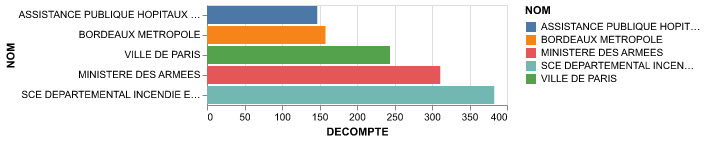

In [8]:
chart = alt.Chart(df2).mark_bar().encode(    
    alt.X('DECOMPTE:Q'),
    alt.Y('NOM:N', sort='x'),
    alt.Color("NOM:N")
    
)

chart

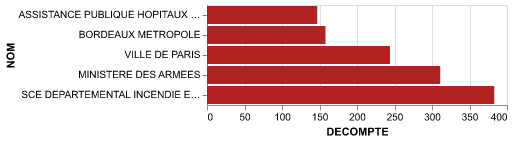

In [9]:


chart = alt.Chart(df2).mark_bar(color='firebrick').encode(    
    alt.X(field='DECOMPTE', type='quantitative'),
    alt.Y(field='NOM', type='nominal', sort='x'),
    #alt.Color(field='NOM', type='nominal')

    
)

chart

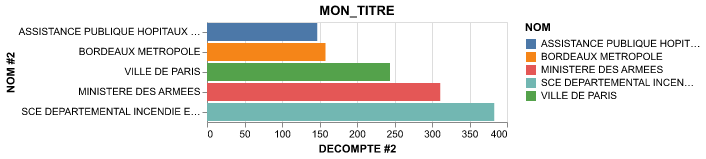

In [10]:
chart = alt.Chart(df2, title='MON_TITRE').mark_bar().encode(    
    alt.X(field='DECOMPTE', type='quantitative', title='DECOMPTE #2'),
    alt.Y(field='NOM', type='nominal', sort='x', title='NOM #2'),
    alt.Color(field='NOM', type='nominal')

    
)

chart